<a href="https://colab.research.google.com/github/lubana99/iTBL2/blob/main/U23103394_Activity2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity #2 (5 marks)


Class Activity: Analyzing NYC Hyperlocal Air Quality Data with Spatial Join

# Objective:
- This activity reinforces concepts from Chapters 6 (Tables), 7 (Visualization), 8 (Functions and Tables), and 9 (Randomness). Students will analyze NYC hyperlocal air quality data using Python in a Jupyter Notebook (Google Colab). The focus will be on leveraging the Table abstraction wherever possible. Additionally, students will use spatial join techniques to combine air quality sensor readings with geographic data.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [1]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [4]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [33]:
pm10_data.dtypes

,0
SensorID,object
time,int64
latitude,float64
longitude,float64
bin0,int64
bin1,int64
bin2,int64
bin3,int64
bin4,int64
bin5,int64


### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [5]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-5-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [34]:
merged_data.dtypes

,0
SensorID,object
time,int64
latitude,float64
longitude,float64
bin0,int64
bin1,int64
bin2,int64
bin3,int64
bin4,int64
bin5,int64


In [6]:
pollution_data = merged_data[['pm10','pm25','neighborhood', 'borough', 'temperature', 'humidity', 'SensorID']]

In [7]:
pollution_data.shape[0]

118495

In [35]:
merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [8]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [9]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [10]:
pollution_data['pm10'].min()

0.0

In [11]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [12]:
joined_table.show(2)

pm10,pm25,neighborhood,borough,temperature,humidity,SensorID
11.35,5.91,Bronx Park,Bronx,16.3,15.2,NYCP1_01A
1.18,1.18,Bronx Park,Bronx,16.2,15.1,NYCP1_01A


print minimum and maximum pm10 values?

In [13]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook. Each task is worth 1 mark , for a total of 5 marks . Use the Table abstraction wherever possible.

# Tasks

###Task 1: Explore the Joined Data Using Tables (1 Mark)
- Display the first 5 rows of the joined_table using .show().
- Print the number of rows and columns in the table.
- Identify any missing values in the table and handle them appropriately (e.g., drop rows with missing values or fill them with a default value).

In [14]:
joined_table.show(5)

pm10,pm25,neighborhood,borough,temperature,humidity,SensorID
11.35,5.91,Bronx Park,Bronx,16.3,15.2,NYCP1_01A
1.18,1.18,Bronx Park,Bronx,16.2,15.1,NYCP1_01A
0.76,0.76,Bronx Park,Bronx,16.1,15.1,NYCP1_01A
47.36,4.48,Bronx Park,Bronx,16.1,15.2,NYCP1_01A
6.18,5.77,Bronx Park,Bronx,16,15.2,NYCP1_01A


In [15]:
print("Number of columns in the dataset is: ", joined_table.num_columns)
print("Number of rows in the dataset is: ", joined_table.num_rows)

Number of columns in the dataset is:  7
Number of rows in the dataset is:  118495


##Table abstraction does not have a direct way to check for missing values in the rows, the following code use the .column() method which results in an array and then check if there are missing values in each column in the dataset.

In [16]:
missing_counts = {col: sum(joined_table.column(col) == None) for col in joined_table.labels}
print(missing_counts)

{'pm10': 0, 'pm25': 0, 'neighborhood': 0, 'borough': 0, 'temperature': 0, 'humidity': 0, 'SensorID': 0}


##no missing values in the dataset

# Task 2: Create Summary Statistics Using Table Operations (1 Mark)

- Compute summary statistics (mean, median, min, max) for the attributes temperature, humidity, and pm25 using table operations like .column() and .apply().
- Group the data by borough and calculate the average pm25 levels for each borough using .group() or .pivot().
- Display the results in a new table.

In [17]:
temp = joined_table.column("temperature")
print("Mean of temperature column: ", np.mean(temp))
print("Median of temperature column: ", np.median(temp))
print("Min and Max of temperature column: ", min(temp), max(temp))

Mean of temperature column:  8.24157728174
Median of temperature column:  7.2
Min and Max of temperature column:  -7.9 10471.0


In [18]:
hum = joined_table.column("humidity")
print("Mean of humidity column: ", np.mean(hum))
print("Median of humidity column: ", np.median(hum))
print("Min and Max of humidity column: ", min(hum), max(hum))

Mean of humidity column:  50.1548647622
Median of humidity column:  46.2
Min and Max of humidity column:  0.0 104.2


In [19]:
pm25 = joined_table.column("pm25")
print("Mean of pm25 column: ", np.mean(pm25))
print("Median of pm25 column: ", np.median(pm25))
print("Min and Max of pm25 column: ", min(pm25), max(pm25))

Mean of pm25 column:  7.37451588675
Median of pm25 column:  3.02
Min and Max of pm25 column:  0.0 3267.02


In [20]:
sel = joined_table.select('borough', 'pm25')
avg = sel.group('borough', np.mean)
avg

borough,pm25 mean
Bronx,7.795
Brooklyn,1.99695
Manhattan,2.37332
Queens,2.07253


# Task 3: Visualize the Data Using Table-Based Plots (1 Mark)

- Create a bar chart showing the average pm25 levels for each borough using .barh().
- Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot.
- Create a histogram of humidity values across all neighborhoods using .hist().

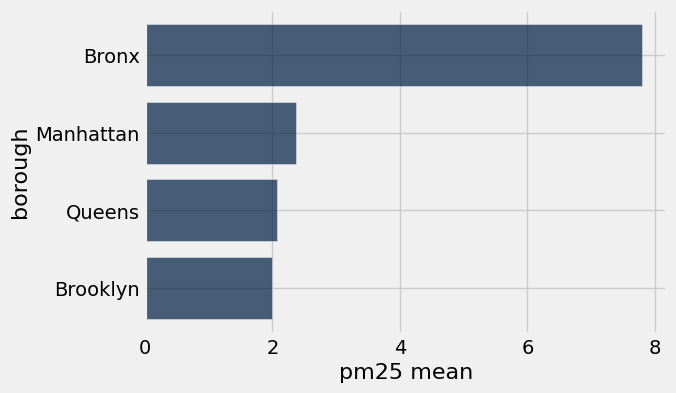

In [21]:
#Visualizing in descending order for better insights
avg.sort("pm25 mean", descending=True).barh("borough")

In [ ]:
joined_table.scatter?

Text(0.5, 1.0, 'Temperature Vs PM2.5')

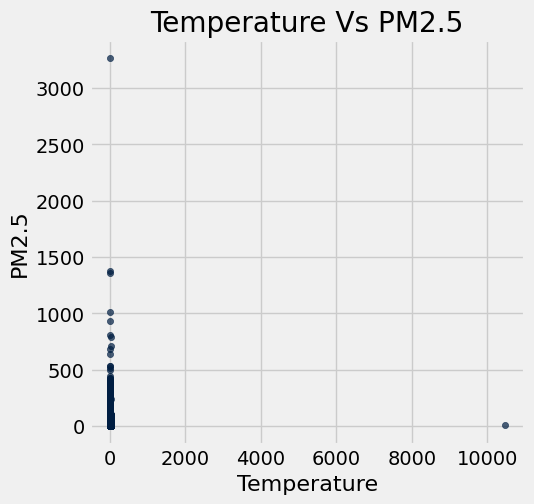

In [22]:
scattorplt = joined_table.scatter("temperature","pm25")
plt.xlabel("Temperature")
plt.ylabel("PM2.5")
plt.title("Temperature Vs PM2.5")

##A scatter plot is useful for visualizing relationships between two variables, helping to identify patterns, trends, and outliers in the data.
##The scatter plot shows that there are two extreme outliers: one in the temperature column and one in the PM2.5 column. The temperature outlier appears significantly high than the rest of the data points, while the PM2.5 outlier is abnormally high compared to the general distribution. These anomalies may indicate errors in data collection.

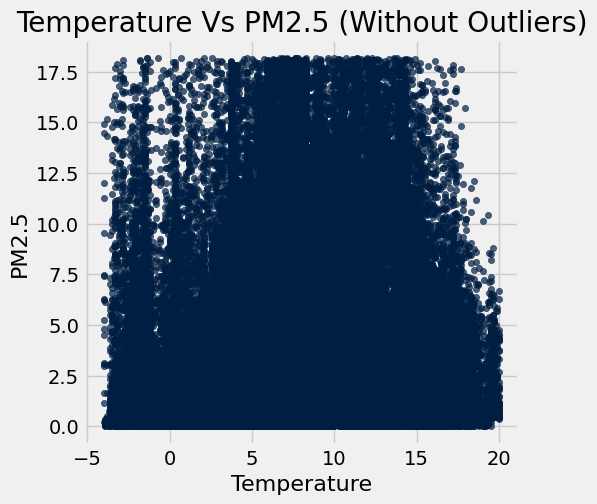

In [23]:
# Function to remove outliers using IQR
def remove_outliers(table, column):
    q1 = np.percentile(table.column(column), 25)
    q3 = np.percentile(table.column(column), 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter rows within the IQR range
    return table.where(column, are.between_or_equal_to(lower_bound, upper_bound))

# Remove outliers from both 'temperature' and 'pm25'
filtered_table = remove_outliers(joined_table, "temperature")
filtered_table = remove_outliers(filtered_table, "pm25")

# Plot the cleaned scatter plot
scatterplt = filtered_table.scatter("temperature", "pm25")
plt.xlabel("Temperature")
plt.ylabel("PM2.5")
plt.title("Temperature Vs PM2.5 (Without Outliers)")
plt.show()


##The plot shows that PM2.5 values are widely distributed across temperature ranges (approximately 0 to 20°C), with higher densities of points occurring in the middle temperature range (5°C to 17°C), indicating no clear linear relationship between temperature and PM2.5 after removing outliers.

In [24]:
#find min and max in order to select the number of bins
joined_table.column("humidity").min(), joined_table.column("humidity").max()

(0.0, 104.2)

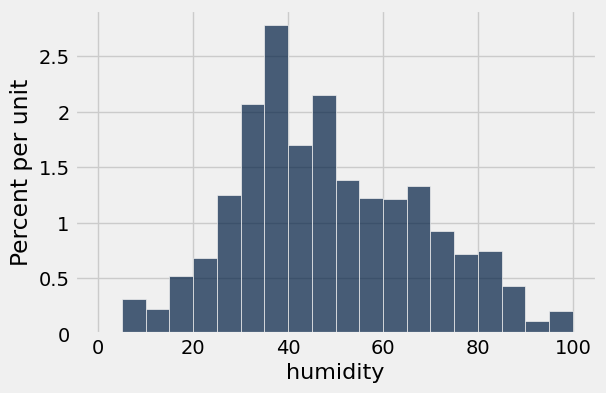

In [25]:
joined_table.hist("humidity", bins = np.arange(0, 105, 5))

# Task 4: Define and Use Functions with Tables (1 Mark)

- Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows:
"Good" if pm25 < 12
"Moderate" if 12 <= pm25 < 35
"Unhealthy" if pm25 >= 35
- Apply this function to the pm25 column in the table using .apply() to create a new column called PM25_Category.
- Count the number of sensors in each PM2.5 category and display the results using .group().


In [26]:
def calculate_pm25_category(pm25):
  if(pm25<12):
    return "Good"
  elif(pm25>=12 and pm25<35):
    return "Moderate"
  else:
    return "Unhealthy"

joined_table = joined_table.with_columns("PM25_Category", joined_table.apply(calculate_pm25_category, "pm25"))
joined_table

pm10,pm25,neighborhood,borough,temperature,humidity,SensorID,PM25_Category
11.35,5.91,Bronx Park,Bronx,16.3,15.2,NYCP1_01A,Good
1.18,1.18,Bronx Park,Bronx,16.2,15.1,NYCP1_01A,Good
0.76,0.76,Bronx Park,Bronx,16.1,15.1,NYCP1_01A,Good
47.36,4.48,Bronx Park,Bronx,16.1,15.2,NYCP1_01A,Good
6.18,5.77,Bronx Park,Bronx,16,15.2,NYCP1_01A,Good
0.73,0.73,Bronx Park,Bronx,15.9,15.3,NYCP1_01A,Good
1.22,1.22,Bronx Park,Bronx,15.8,15.4,NYCP1_01A,Good
5.82,4.57,Bronx Park,Bronx,15.8,15.4,NYCP1_01A,Good
11.04,5.61,Bronx Park,Bronx,15.7,15.5,NYCP1_01A,Good
1.29,1.29,Bronx Park,Bronx,15.6,15.6,NYCP1_01A,Good


In [27]:
joined_table.group(["PM25_Category", "SensorID"])

PM25_Category,SensorID,count
Good,NYCP1_01A,101851
Moderate,NYCP1_01A,12651
Unhealthy,NYCP1_01A,3993


# Task 5: Simulate Random Sampling Using Tables (1 Mark)
- Randomly sample 10% of the rows from the table without replacement using .sample().
- Calculate the mean pm25 level for the sampled data.
- Repeat the random sampling process 100 times and store the mean pm25 values from each iteration in a list.
- Create a histogram of the 100 mean pm25 values to visualize the distribution of sample means.

In [ ]:
joined_table.sample?

In [29]:
sampled = joined_table.sample(int(0.1*joined_table.num_rows), with_replacement=False)
sampled.show(5)

pm10,pm25,neighborhood,borough,temperature,humidity,SensorID,PM25_Category
13.32,13.01,Hunts Point,Bronx,14.3,17.6,NYCP1_01A,Moderate
2.69,2.69,Hunts Point,Bronx,4.3,67.7,NYCP1_01A,Good
4.48,4.47,Bronx Park,Bronx,6.6,61.9,NYCP1_01A,Good
25.07,7.7,Longwood,Bronx,6.6,34.4,NYCP1_01A,Good
12.62,12.02,Hunts Point,Bronx,10.4,66.6,NYCP1_01A,Moderate


In [30]:
np.mean(sampled.column("pm25"))

7.3043818043716762

In [31]:
pm_means = []
for i in np.arange(0,100):
  sampled = joined_table.sample(int(0.1*joined_table.num_rows), with_replacement=False)
  pm_means.append(np.mean(sampled.column("pm25")))

len(pm_means)

100

Text(0.5, 1.0, 'Distribution of Sample Means (100 Samples)')

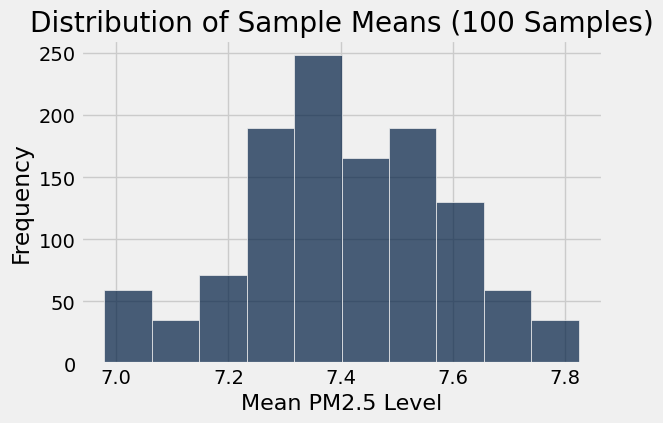

In [32]:
pm_table = Table().with_columns("PM2.5 Mean", pm_means)
pm_table.hist("PM2.5 Mean")

plt.xlabel("Mean PM2.5 Level")
plt.ylabel("Frequency")
plt.title("Distribution of Sample Means (100 Samples)")

##We can conclude that the distribution of sample means (calculated from repeatedly taking 10% samples of the dataset) approximates a normal distribution

# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
- Each task is worth 1 mark , based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 6, 7, 8, and 9 for guidance on tables, functions, visualizations, and randomness.
- Test your code frequently to ensure it runs without errors.